## **Phân tích dữ liệu các mặt hàng điện tử và đánh giá của người tiêu dùng trên thế giới di động**

In [1]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy import stats

In [2]:
#Đọc 2 tập dữ liệu đã thu thập bằng pandas

df_item = pd.read_csv('output.csv')
df_reviews = pd.read_csv('output2.csv')

## Xử lý dữ liệu (tiền phân tích)

In [3]:
#Hiển thị số lượng hàng và cột trên Dataset
print('Dataframe của các mặt hàng có số hàng là {} và số cột là {}'.format(df_item.shape[0], df_item.shape[1]))
print('Dataframe đánh giá của người tiêu dùng có số hàng là {} và số cột là {}'.format(df_reviews.shape[0], df_reviews.shape[1]))

Dataframe của các mặt hàng có số hàng là 390 và số cột là 9
Dataframe đánh giá của người tiêu dùng có số hàng là 20438 và số cột là 5


In [4]:
#Hiển thị 5 index đầu của dataframe
df_item.head()

,Item ID,Item Category,Item Name,Brand Name,Item URL,Price,Rate,Total Reviews,Retrieved Date
0,226935,Smartphone,Samsung Galaxy Z Fold3 5G 256GB,Samsung,https://www.thegioididong.com/dtdd/samsung-gal...,41990000,4.8,12,01/03/2022
1,153856,Smartphone,iPhone 11,Apple,https://www.thegioididong.com/dtdd/iphone-11?s...,16990000,3.6,497,01/03/2022
2,248293,Smartphone,Xiaomi 11T 5G 128GB,Xiaomi,https://www.thegioididong.com/dtdd/xiaomi-11t?...,10990000,4.2,111,01/03/2022
3,234315,Smartphone,Samsung Galaxy A32,Samsung,https://www.thegioididong.com/dtdd/samsung-gal...,6490000,2.9,540,01/03/2022
4,239747,Smartphone,OPPO Reno6 Z 5G,OPPO,https://www.thegioididong.com/dtdd/oppo-reno6-...,9490000,3.6,413,01/03/2022


In [5]:
df_reviews.head()

,Name of reviewer,Category,rate,content,brand of Item
0,Trần Hồng Thịnh,Smartphone,5,Sản phẩm tốt. Nhân viên hỗ trợ nhiệt tình. Chơ...,Samsung
1,Nguyễn Tấn Đạt,Smartphone,5,Sử dụng song song với ip 12 promax. Thật sự tr...,Samsung
2,Lan,Smartphone,4,Chuyển từ note qua và có nhận xét là về sang t...,Samsung
3,Tung Tung,Smartphone,5,"Quá sang trọng, quá ngon, giá so với các sản p...",Samsung
4,Duncan Nguyen,Smartphone,5,ádfassdasdfasdygfuiasyfyvffasfyavsyfdbasudfbas...,Samsung


### làm sạch dữ liệu

In [6]:
#Hiện thị tên cột của dataset
df_item.columns

Index(['Item ID', 'Item Category', 'Item Name', 'Brand Name', 'Item URL',
       'Price', 'Rate', 'Total Reviews', 'Retrieved Date'],
      dtype='object')

In [7]:
df_item.drop(['Item ID', 'Item URL', 'Retrieved Date','Item Name' ],axis=1,inplace=True)

In [8]:
df_reviews.columns

Index(['Name of reviewer', 'Category', 'rate', 'content', 'brand of Item'], dtype='object')

In [9]:
df_reviews.drop(['Name of reviewer', 'content' ],axis=1,inplace=True)

In [10]:
n = len(df_reviews["brand of Item"])
cate = ["Apple", "Samsung", "OPPO", "Xiaomi", 'Realme']
for i in range(n):
    if df_reviews["brand of Item"][i] in cate:
        df_reviews["brand of Item"][i] = df_reviews["brand of Item"][i]
    else:
        df_reviews["brand of Item"][i] = "Other"

<ipython-input-10-36a2c144e037>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["brand of Item"][i] = df_reviews["brand of Item"][i]
<ipython-input-10-36a2c144e037>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["brand of Item"][i] = "Other"


In [11]:
z = []
n = len(df_item["Brand Name"])
for i in range(n):
    if df_item["Rate"][i] == 0:
        z.append(i)

df_item = df_item.drop(z)
        

- Xử lý các dữ liệu bị thiếu

In [12]:
#Kiểm tra các giá trị bị thiếu
df_item.isnull().sum()

Item Category    0
Brand Name       0
Price            0
Rate             0
Total Reviews    0
dtype: int64

In [13]:
df_reviews.isnull().sum()

Category         0
rate             0
brand of Item    0
dtype: int64

In [14]:
df_item.head()

,Item Category,Brand Name,Price,Rate,Total Reviews
0,Smartphone,Samsung,41990000,4.8,12
1,Smartphone,Apple,16990000,3.6,497
2,Smartphone,Xiaomi,10990000,4.2,111
3,Smartphone,Samsung,6490000,2.9,540
4,Smartphone,OPPO,9490000,3.6,413


In [15]:
df_reviews.head()

,Category,rate,brand of Item
0,Smartphone,5,Samsung
1,Smartphone,5,Samsung
2,Smartphone,4,Samsung
3,Smartphone,5,Samsung
4,Smartphone,5,Samsung


In [16]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 389
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Category  258 non-null    object 
 1   Brand Name     258 non-null    object 
 2   Price          258 non-null    int64  
 3   Rate           258 non-null    float64
 4   Total Reviews  258 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 12.1+ KB


In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20438 entries, 0 to 20437
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       20438 non-null  object
 1   rate           20438 non-null  int64 
 2   brand of Item  20438 non-null  object
dtypes: int64(1), object(2)
memory usage: 479.1+ KB


## Tính các giá trị hướng tâm cho các biện định lượng

In [18]:
df_item.describe()

,Price,Rate,Total Reviews
count,2.580000e+02,258.000000,258.000000
mean,5.429344e+06,3.446899,78.395349
std,7.389532e+06,0.775808,117.900500
min,1.500000e+03,1.200000,3.000000
25%,4.125000e+05,2.925000,13.000000
50%,1.395000e+06,3.500000,32.500000
75%,8.365000e+06,4.000000,91.500000
max,4.199000e+07,5.000000,791.000000


In [19]:
df_reviews.describe()

,rate
count,20438.000000
mean,3.572463
std,1.443293
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## vẽ biểu đồ column chart cho các biến định tính

In [20]:
def column(df,data):
    x = df.groupby(data.name)[data.name].count()
    y = pd.DataFrame(x)
    y.columns = ['Số người']
    if len(y['Số người']) < 7:
        print(y)
    y.reset_index(inplace=True)

    ax =sns.barplot(x=data.name,y='Số người',data = y)
    plt.title('Column chart ', size=20, color='r')
    plt.show()

                             Số người
Item Category                        
Basic mouse                        35
Rechargeable battery backup        67
Smart watch                        18
Smartphone                        124
Tablet                             14


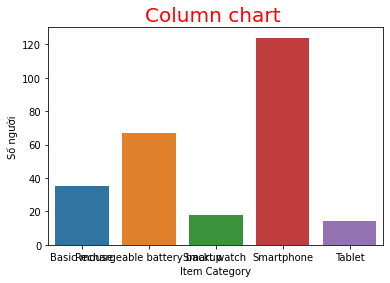

In [21]:
column(df_item, df_item['Item Category'])

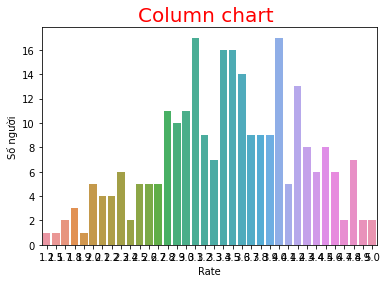

In [22]:
column(df_item, df_item['Rate'])

      Số người
rate          
1         2823
2         2221
3         3922
4         3377
5         8095


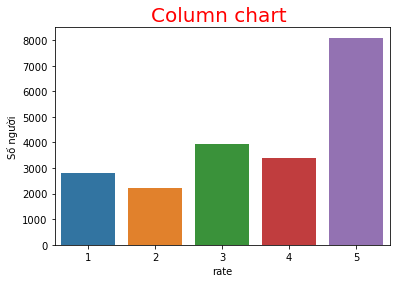

In [23]:
column(df_reviews, df_reviews['rate'])

<AxesSubplot:>

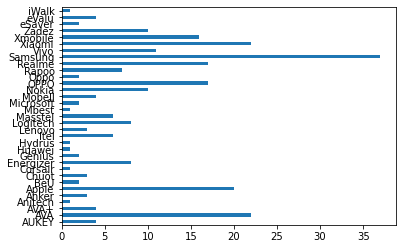

In [24]:
df_item['Brand Name'].value_counts().sort_index().plot.barh()

# dùng t-test để so sánh điểm đánh giá của Smartphones và Rechargeable battery backup

In [25]:
dtn = df_item[['Item Category', 'Rate']]
cate = dtn.groupby('Item Category').groups

# Lấy giá trị tương ứng ở cột Điểm cuối kỳ

dth = df_item['Rate'][cate['Smartphone']]
dth.name = 'Smartphone'
pin = df_item['Rate'][cate['Rechargeable battery backup']]
pin.name = 'Rechargeable battery backup'

dtdd = dtn[dtn['Item Category']=='Smartphone']
sdp = dtn[dtn['Item Category']=='Rechargeable battery backup']
df_new = pd.concat([dtdd, sdp])


   # Phát biểu giả thiết:

- $H_0: \mu_0 = \mu_1$. Điểm đánh giá của các sản phẩm điện thoại và sạc dự phòng là như nhau.

- $H_1: \mu_0 \neq \mu_1$.Điểm đánh giá của các sản phẩm điện thoại và sạc dự phòng là có sự khác biệt.

In [26]:
# Kiểm định T-test:
pins = pin.sample(50)
dths = dth.sample(50)

stt, pv = stats.ttest_ind(dths, pins)
print('Giá trị kiểm định = ',stt)
print('pvalue  = ',pv)
if (pv > 0.05):
    print("Không có bằng chứng để bác bỏ H0: 𝜇0=𝜇1 ")
    print('Điều này ngụ ý là: 𝜇0=𝜇1. Điểm đánh giá của các sản phẩm điện thoại và sạc dự phòng là như nhau.')
else:
    print('đã có đủ bằng chứng để bác bỏ H0: 𝜇0=𝜇1 ')
    print('ta chấp nhận giả thiết Ha với mức ý nghĩa là 5%')
    print(' Điểm đánh giá của các sản phẩm điện thoại và sạc dự phòng là có sự khác biệt')
print('-'*100)

Giá trị kiểm định =  0.26517814996953276
pvalue  =  0.791429212507685
Không có bằng chứng để bác bỏ H0: 𝜇0=𝜇1 
Điều này ngụ ý là: 𝜇0=𝜇1. Điểm đánh giá của các sản phẩm điện thoại và sạc dự phòng là như nhau.
----------------------------------------------------------------------------------------------------


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


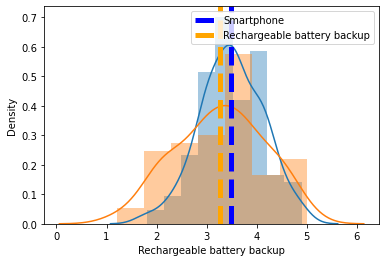

In [27]:
plt.figure()
ax1 = sns.distplot(dth)
ax2 = sns.distplot(pin)
plt.axvline(np.mean(dth), color='b', linestyle='dashed', linewidth=5, label="Smartphone")
plt.axvline(np.mean(pin), color='orange', linestyle='dashed', linewidth=5, label="Rechargeable battery backup")
plt.legend()
plt.show()

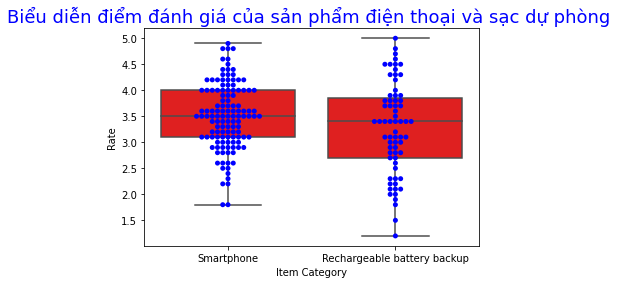

In [28]:
sns.boxplot(x='Item Category', y='Rate', data=df_new, color='red')
sns.swarmplot(x="Item Category", y="Rate", data=df_new, color='blue')
plt.title('Biểu diễn điểm đánh giá của sản phẩm điện thoại và sạc dự phòng ', size=18, color = 'Blue')
plt.show()

## Kruskal–Wallis test

Xây dựng giả thuyết:
$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5} = \mu_{6}$$
$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

In [29]:
df8 = df_reviews[['brand of Item','rate']]
df8 = df8.rename(columns = {'brand of Item' : 'Thương hiệu', 
                           'rate' : 'score'})
df8.sample(10)

,Thương hiệu,score
4548,OPPO,5
8397,Xiaomi,3
17149,Other,5
8063,Samsung,4
18802,Other,4
3835,Samsung,3
18778,Samsung,3
8267,Xiaomi,3
7613,Samsung,3
19892,Other,5


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


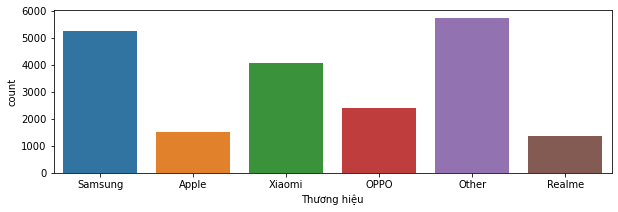

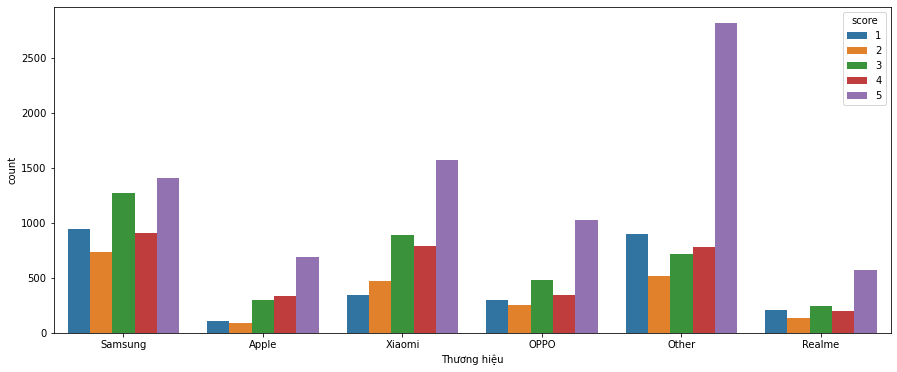

In [42]:
plt.figure(figsize=(10,3))
sns.countplot(df8["Thương hiệu"])
plt.show()
plt.figure(figsize=(15,6))
sns.countplot(x=df8["Thương hiệu"], hue=df8["score"], data=pd.melt(df8))
plt.show()

In [30]:
brand1 = df8[df8['Thương hiệu'] == 'Apple']
brand2 = df8[df8['Thương hiệu'] == 'Samsung']
brand3 = df8[df8['Thương hiệu'] == 'OPPO']
brand4 = df8[df8['Thương hiệu'] == 'Xiaomi']
brand5 = df8[df8['Thương hiệu'] == 'Realme']
brand6 = df8[df8['Thương hiệu'] == 'Other']

In [31]:
from scipy.stats import kruskal


st, pv = kruskal(brand1['score'], brand2['score'],brand3['score'], brand4['score'], brand5['score'], brand6['score'])
print('Giá trị kiểm định: ',st)
print('p_value: ',pv)
if (pv < 0.05):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng điểm đánh giá giữa các sản phẩm đến từ thương hiệu khác nhau có sự khác biệt với mức ý nghĩa là 5% ')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")
    print("Điều này ngụ ý rằng Điểm đánh giá giữa các sản phẩm đến từ thương hiệu khác nhau không có sự khác biệt")

Giá trị kiểm định:  558.3193926552599
p_value:  2.0415436730214528e-118
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng điểm đánh giá giữa các sản phẩm đến từ thương hiệu khác nhau có sự khác biệt với mức ý nghĩa là 5% 


In [37]:
import scikit_posthocs as sp

sp.posthoc_dunn(df8, 'score', 'Thương hiệu', 'bonferroni')

,Apple,OPPO,Other,Realme,Samsung,Xiaomi
Apple,1.000000e+00,1.359535e-05,8.502149e-02,1.683708e-06,9.244195e-60,1.256811e-06
OPPO,1.359535e-05,1.000000e+00,1.299702e-02,1.000000e+00,7.299563e-37,1.000000e+00
Other,8.502149e-02,1.299702e-02,1.000000e+00,1.370369e-03,2.162250e-95,1.166522e-03
Realme,1.683708e-06,1.000000e+00,1.370369e-03,1.000000e+00,2.649617e-19,1.000000e+00
Samsung,9.244195e-60,7.299563e-37,2.162250e-95,2.649617e-19,1.000000e+00,5.771772e-51
Xiaomi,1.256811e-06,1.000000e+00,1.166522e-03,1.000000e+00,5.771772e-51,1.000000e+00
